In [1]:
import os
import regex
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import spacy
from spacy.lang.pl import Polish
import os
import random
import numpy

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
!pip install morfeusz2

In [3]:
import morfeusz2

In [4]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = '/content/drive/MyDrive/DATA_SCIENCE/PJN/'

In [6]:
# Make sure the texts in the corpus does not contain HTML code.
# Use SpaCy tokenizer API to tokenize the text from the cleaned law corpus.

files = []
nlp = Polish()
for filename in os.listdir(data):
    with open(data +'/'+filename , encoding='utf-8') as f:
        file_content = f.read().replace("\n", " ")
        if bool(BeautifulSoup(file_content, "html.parser").find()):
            raise CustomException('html code')
        doc = nlp(file_content)
        tokenized_file = []
        for t in doc:
            tokenized_file.append(t)
        files.append(tokenized_file)

In [7]:
# Compute frequency list for each of the processed files.

from collections import defaultdict
def def_value():
    return 0

freq_lists = []
for f in files:
    file_freq_dict = defaultdict(def_value)
    for t in f:
        file_freq_dict[t.text]+=1
    freq_lists.append(file_freq_dict)

In [8]:
# Aggregate the result to obtain one global frequency list.

freq_dict_global = defaultdict(def_value)
for d in freq_lists:
    for k in d.keys():
        freq_dict_global[k]+=d[k]

In [9]:
# Reject all entries that are shorter than 2 characters or contain non-letter characters (make sure to include Polish diacritics).

allowed_chars = regex.compile('^[AaĄąBbCcĆćDdEeĘęFfGgHhIiJjKkLlŁłMmNnŃńOoÓóPpRrSsŚśTtUuWwYyZzŹźŻż]+$')
dict_keys = freq_dict_global.keys()
for k in list(freq_dict_global.keys()):
    if (len(k)==1) or (not (allowed_chars.match(k))):
        freq_dict_global.pop(k, None)

In [10]:
freq_dict_global_sorted=sorted(freq_dict_global.items(), key=lambda kv: kv[1])
freq_dict_global_sorted.reverse()
freq_dict_global_top100 = freq_dict_global_sorted[:100]
freq_dict_global_top100

[('do', 57267),
 ('ust', 53363),
 ('na', 49420),
 ('się', 45880),
 ('lub', 45800),
 ('Nr', 43414),
 ('oraz', 33552),
 ('mowa', 28780),
 ('nie', 22342),
 ('przez', 20729),
 ('pkt', 19124),
 ('dnia', 17937),
 ('których', 17928),
 ('od', 16031),
 ('jest', 13193),
 ('ustawy', 13067),
 ('po', 12988),
 ('może', 12076),
 ('którym', 11787),
 ('brzmienie', 10576),
 ('za', 10322),
 ('otrzymuje', 9835),
 ('spraw', 9034),
 ('albo', 8708),
 ('dodaje', 8423),
 ('ich', 8196),
 ('jeżeli', 7802),
 ('dla', 7727),
 ('której', 7476),
 ('brzmieniu', 7295),
 ('drodze', 7179),
 ('pracy', 6957),
 ('podstawie', 6849),
 ('stosuje', 6674),
 ('przypadku', 6494),
 ('niż', 6451),
 ('tym', 6366),
 ('jego', 6320),
 ('Minister', 6190),
 ('są', 6155),
 ('być', 6119),
 ('zakresie', 6098),
 ('właściwy', 5936),
 ('wyrazy', 5816),
 ('ustawie', 5473),
 ('ze', 5452),
 ('także', 5445),
 ('rozporządzenia', 5313),
 ('tych', 5048),
 ('określonych', 5043),
 ('przepisów', 4989),
 ('terminie', 4825),
 ('zastępuje', 4818),
 ('osób',

<BarContainer object of 100 artists>

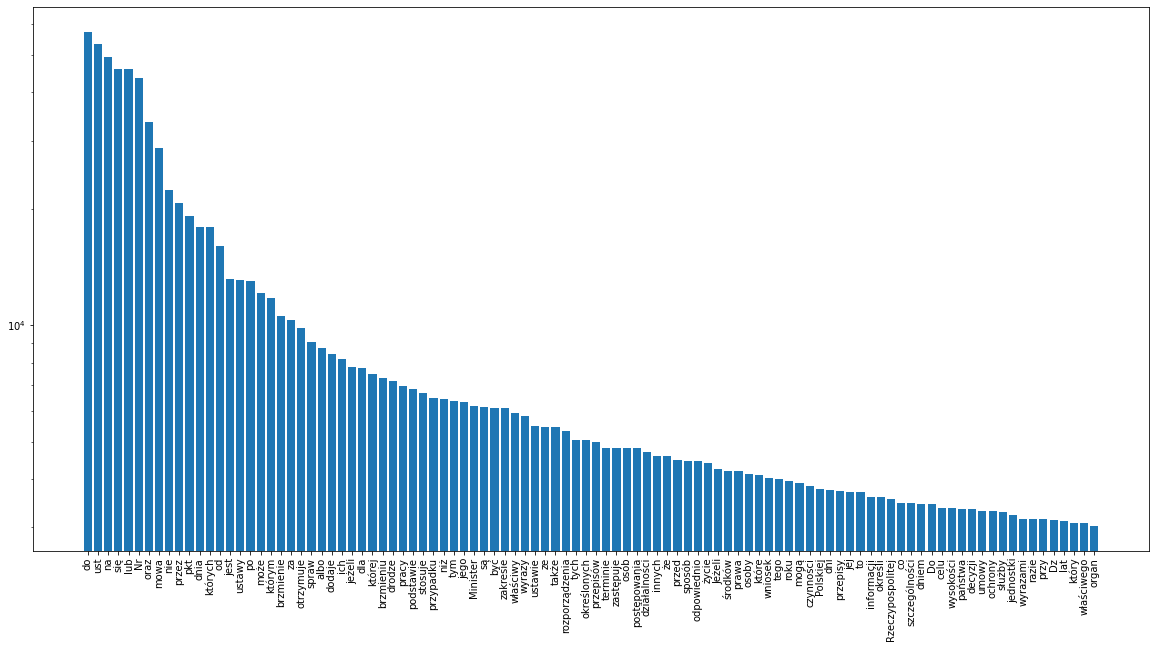

In [11]:
# Make a plot in a logarithmic scale (for X and Y):
# -axis should contain the rank of a term, meaning the first rank belongs to the term with the highest number of occurrences; the terms with the same number of occurrences should be ordered by their name,
# Y-axis should contain the number of occurrences of the term with given rank.

labels = []
values = []
for name, value in freq_dict_global_top100:
    labels.append(name)
    values.append(value)
    
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.bar(labels, values, log=True)

In [12]:
# Install Morfeusz (Binding dla Pythona) and use it to find all words that do not appear in that dictionary.


morf = morfeusz2.Morfeusz()
not_in_morf = []

for k in freq_dict_global:
    if morf.analyse(k)[0][2][2] == 'ign':
        not_in_morf.append(k)

In [13]:
not_in_morf

['uchybionych',
 'emerytalno',
 'pozorolniczych',
 'codzoziemcowi',
 'RON',
 'Poz',
 'SWW',
 'poscaleniowego',
 'inspekcyjno',
 'poz',
 'zględnieniu',
 'wo',
 'jewodów',
 'któ',
 'rych',
 'jewodzie',
 'sprawdzalnie',
 'miesiący',
 'ymierzonych',
 'przycznach',
 'protokoł',
 'dziesięcu',
 'EKD',
 'PCN',
 'KWiU',
 'KRŚT',
 'KZ',
 'SFPO',
 'przyspobienia',
 'WCO',
 'Marakeszu',
 'próbobiorcami',
 'próbobiorcom',
 'próbobiorców',
 'dziewiętnastuw',
 'ustanowiewniu',
 'wykrywczych',
 'prokolarne',
 'obniżeniemstopnia',
 'porejestrowym',
 'Porejestrowe',
 'porejestrowego',
 'otoczkowania',
 'MARPOL',
 'SDR',
 'Ultrechckiej',
 'Boryjskie',
 'Nepryski',
 'hip',
 'English',
 'Language',
 'Bischoefliche',
 'Methodistische',
 'Kirche',
 'Gemeinschaft',
 'Southern',
 'Trade',
 'Kroplewo',
 'Smykowo',
 'SSG',
 'ogólnokształcą',
 'członkow',
 'PZZ',
 'IIa',
 'Ia',
 'IIIa',
 'reglaminów',
 'ogranowi',
 'stwierdzajace',
 'czynnści',
 'odpowiadajacym',
 'zgranicznego',
 'przedsiębioców',
 'dosyłkowe',


In [14]:
# Find 30 words with the highest ranks that do not belong to the dictionary.
not_in_morf_freq = defaultdict(def_value)
for w in not_in_morf:
    not_in_morf_freq[w] = freq_dict_global[w]

not_in_morf_freq_sorted=sorted(not_in_morf_freq.items(), key=lambda kv: kv[1])
not_in_morf_freq_sorted.reverse()
not_in_morf_freq_sorted[:30]

[('późn', 1065),
 ('GMO', 298),
 ('SWW', 212),
 ('SKW', 194),
 ('IKE', 162),
 ('remediacji', 120),
 ('URE', 101),
 ('UKE', 97),
 ('kN', 95),
 ('CN', 83),
 ('PKWiU', 81),
 ('UDT', 77),
 ('BSWSG', 70),
 ('BSWP', 66),
 ('Biobójczych', 55),
 ('PHS', 53),
 ('FEP', 42),
 ('MgO', 41),
 ('UTK', 40),
 ('FRD', 36),
 ('RON', 35),
 ('CBŚP', 34),
 ('DOKE', 34),
 ('UOKiK', 33),
 ('HACCP', 32),
 ('PCN', 32),
 ('ITS', 31),
 ('poz', 30),
 ('inulinowego', 29),
 ('EFRROW', 28)]

In [15]:
zad_8 = []
for z in not_in_morf_freq_sorted[:30]:
    zad_8.append(z[0])
zad_8

['późn',
 'GMO',
 'SWW',
 'SKW',
 'IKE',
 'remediacji',
 'URE',
 'UKE',
 'kN',
 'CN',
 'PKWiU',
 'UDT',
 'BSWSG',
 'BSWP',
 'Biobójczych',
 'PHS',
 'FEP',
 'MgO',
 'UTK',
 'FRD',
 'RON',
 'CBŚP',
 'DOKE',
 'UOKiK',
 'HACCP',
 'PCN',
 'ITS',
 'poz',
 'inulinowego',
 'EFRROW']

In [16]:
# Find 30 random words (i.e. shuffle the words) with 5 occurrences that do not belong to the dictionary.

unknown_words = list(not_in_morf_freq.keys())
random.shuffle(unknown_words)
zad_9 = []
for word in unknown_words:
    if not_in_morf_freq[word]==5:
        print(word)
        zad_9.append(word)
        if len(zad_9) == 30:
            break

Shigella
sposb
zawart
RCI
INCI
regazyfikacyjnego
Schetyna
RR
winopochodne
Betezda
Wlkp
ośc
ym
URT
teryto
remediację
najmnie
ODP
GJ
jed
wo
tów
próbobiorców
denitracyjne
ami
ppkt
chelatującym
Contagious
rialnego


In [17]:
def corrections_1(word):
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def corrections_2(word): 
    return (c2 for c1 in corrections_1(word) for c2 in corrections_1(c1))

def corrections_3(word): 
    return (c2 for c1 in corrections_2(word) for c2 in corrections_2(c1))

In [18]:
# Use Levenshtein distance and the frequency list, to determine the most probable correction of the words from lists defined in points 8 and 9. (Note: You don't have to apply the distance directly. Any method that is more efficient than scanning the dictionary will be appreciated.)
count=0
for word in zad_8:
        corr = ''
        corrections_1_output = corrections_1(word)
        for c in corrections_1_output:
            a = morf.analyse(c)
            if a[0][2][2] != 'ign':
                corr = a[0][2][0]
                print("{ori} ===> {new}     distance 1".format(ori = word, new = corr))
                break
        if corr == '':
            corrections_2_output = list(corrections_2(word))
            for c in corrections_2_output:
                a = morf.analyse(c)
                if a[0][2][2] != 'ign':
                    corr = a[0][2][0]
                    print("{ori} ===> {new}     distance 2".format(ori = word, new = corr))
                    break
        if corr == '': 
            print("Could not correct {ori} in distance 2".format(ori = word))
                
        print("\n")

późn ===> późne     distance 1


GMO ===> dMO     distance 1


SWW ===> SuW     distance 1


SKW ===> SKa     distance 1


IKE ===> KIE     distance 1


remediacji ===> premediacji     distance 1


URE ===> UlE     distance 1


UKE ===> UlE     distance 1


kN ===> pkN     distance 1


CN ===> uN     distance 1


PKWiU ===> PaWiU     distance 1


UDT ===> UhT     distance 1


BSWSG ===> ByWSi     distance 2


BSWP ===> BSP     distance 1


Biobójczych ===> Biozbójczych     distance 1


PHS ===> PkS     distance 1


FEP ===> dEP     distance 1


MgO ===> agO     distance 1


UTK ===> UTyK     distance 1


FRD ===> uRD     distance 1


RON ===> jON     distance 1


CBŚP ===> CBŚ     distance 1


DOKE ===> DOlE     distance 1


UOKiK ===> lOgiK     distance 2


HACCP ===> HACCe     distance 1


PCN ===> PN     distance 1


ITS ===> IsS     distance 1


poz ===> pot     distance 1


inulinowego ===> insulinowego     distance 1


EFRROW ===> ExuROW     distance 2




In [19]:
count=0
for word in zad_9:
        corr = ''
        corrections_1_output = corrections_1(word)
        for c in corrections_1_output:
            a = morf.analyse(c)
            if a[0][2][2] != 'ign':
                corr = a[0][2][0]
                print("{ori} ===> {new}     distance 1".format(ori = word, new = corr))
                break
        if corr == '':
            corrections_2_output = list(corrections_2(word))
            for c in corrections_2_output:
                a = morf.analyse(c)
                if a[0][2][2] != 'ign':
                    corr = a[0][2][0]
                    print("{ori} ===> {new}     distance 2".format(ori = word, new = corr))
                    break
        if corr == '': 
            print("Could not correct {ori} in distance 2".format(ori = word))
                
        print("\n")
        

Could not correct Shigella in distance 2


sposb ===> spoci     distance 2


zawart ===> zawarty     distance 1


RCI ===> pCI     distance 1


INCI ===> INgI     distance 1


regazyfikacyjnego ===> pregazyfikacyjnego     distance 1


Schetyna ===> chityna     distance 2


RR ===> Rp     distance 1


winopochodne ===> sinopochodne     distance 1


Betezda ===> etezja     distance 2


Wlkp ===> Wlep     distance 1


ośc ===> ości     distance 1


ym ===> my     distance 1


URT ===> UhT     distance 1


teryto ===> teryno     distance 1


remediację ===> premediację     distance 1


najmnie ===> najmniej     distance 1


ODP ===> ODa     distance 1


GJ ===> Gm     distance 1


jed ===> jod     distance 1


wo ===> owo     distance 1


tów ===> rów     distance 1


próbobiorców ===> proobiorców     distance 2


denitracyjne ===> penetracyjne     distance 2


ami ===> mai     distance 1


ppkt ===> pakt     distance 1


chelatującym ===> chatującym     distance 2


Could not correct Cont

In [20]:
# Zadania z Elastic Search nie zrobiłem